<h3>Kaggle Challenge</h3>
<h1>Expedia Hotel Recommendations</h1>
<hr style="height:2px;border:none;color:#333;background-color:#333;"/>

### Imports

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta as td
pd.set_option('display.max_columns', 500)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)

In [2]:
expediaDF = pd.read_csv('data/train.csv.gz', 
#                         nrows=1000000,
                        compression='gzip',
                        error_bad_lines=False)

In [3]:
destinationDF = pd.read_csv('data/destinations.csv.gz', compression='gzip',
                   error_bad_lines=False)

In [6]:
expediaDF.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21


In [5]:
expediaDF.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,629753.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,9.731860,2.634367,84.824758,319.487129,27877.486461,2012.650225,5.775807e+05,0.134856,0.253458,5.840012,2.023743,0.327135,1.117595,14511.167748,2.590600,0.082096,1.478440,3.209053,80.961941,601.094632,49.894015
std,12.167062,0.799402,55.612803,217.538183,16690.723534,2268.741849,3.292401e+05,0.341570,0.434991,3.730820,0.910264,0.725370,0.468953,11091.836907,2.154406,0.274511,1.217883,1.660580,55.470145,515.850638,28.962143
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,66.000000,174.000000,13476.000000,324.314100,3.024860e+05,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.000000,155.000000,25.000000
50%,2.000000,3.000000,66.000000,317.000000,27731.000000,1158.510400,5.798110e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,9524.000000,1.000000,0.000000,1.000000,2.000000,50.000000,587.000000,49.000000
75%,13.000000,3.000000,69.000000,403.000000,42397.000000,2591.272700,8.498740e+05,0.000000,1.000000,9.000000,2.000000,0.000000,1.000000,18998.000000,5.000000,0.000000,2.000000,4.000000,105.000000,701.000000,73.000000
max,53.000000,4.000000,239.000000,1025.000000,56507.000000,11946.220200,1.198784e+06,1.000000,1.000000,10.000000,9.000000,9.000000,8.000000,65102.000000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [7]:
destinationDF.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65,d66,d67,d68,d69,d70,d71,d72,d73,d74,d75,d76,d77,d78,d79,d80,d81,d82,d83,d84,d85,d86,d87,d88,d89,d90,d91,d92,d93,d94,d95,d96,d97,d98,d99,d100,d101,d102,d103,d104,d105,d106,d107,d108,d109,d110,d111,d112,d113,d114,d115,d116,d117,d118,d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,d138,d139,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.043789,-2.181690,-2.181690,-2.181690,-2.165028,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.165028,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.181690,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,-2.224164,-2.209855,-2.224164,-2.110723,-2.186008,-2.224164,-2.124474,-2.224164,-2.156467,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.153316,-2.186008,-2.224164,-2.224164,-2.224164,-2.128237,-2.158309,

## Data Analysis

- How many data?

In [8]:
print('Rows: ',expediaDF['site_name'].size)

Rows:  37670293


- How many features?

In [12]:
print('No. of Features: ',expediaDF.shape[1])

No. of Features:  24


- How many hotel market?

In [79]:
uniq = expediaDF.hotel_market.unique().size
print('No. of hotel market: ', uniq)

No. of hotel market:  2118


### Types of the features

Text(0.5,1,'Features Quantity per Type')

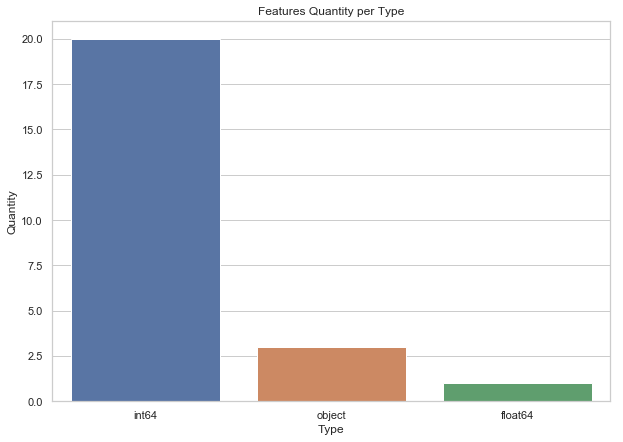

In [13]:
fig, ax = plt.subplots()

types = expediaDF.dtypes.value_counts()

sns.barplot(types.index, types.values)
ax.set_ylabel("Quantity")
ax.set_xlabel("Type")
ax.set_title('Features Quantity per Type')

### Hotel Clusters

In [14]:
uniqueClusters = expediaDF['hotel_cluster'].unique().size
print("Total n. hotel clusters: ", uniqueClusters)

Total n. hotel clusters:  100


Distribution of the Hotel Clusters


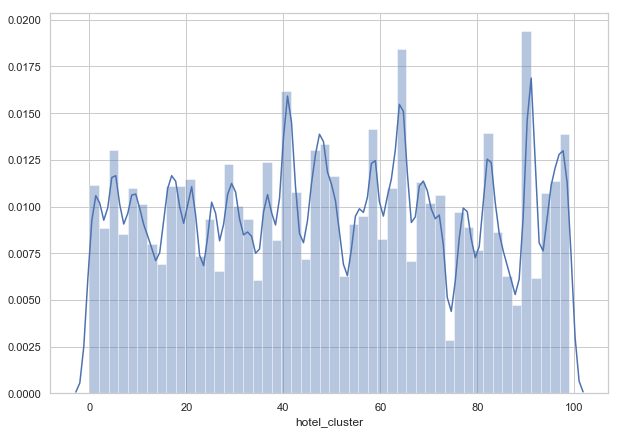

In [15]:
print("Distribution of the Hotel Clusters")
sns.distplot(expediaDF['hotel_cluster']);

### Users

In [16]:
uniqueUsers = expediaDF['user_id'].unique().size
print("Total n. usuários: ", uniqueUsers)

Total n. usuários:  1198786


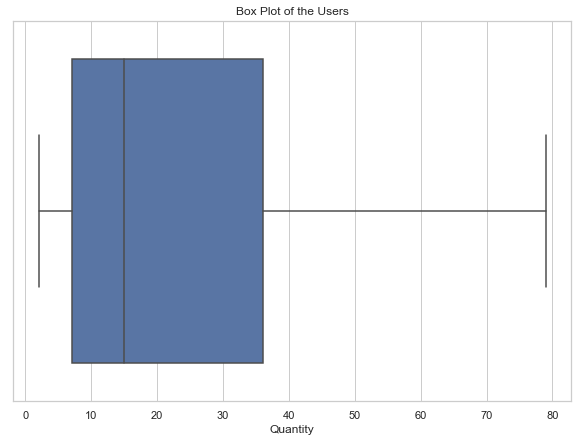

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(expediaDF['user_id'].value_counts(),showfliers=False)
plt.title('Box Plot of the Users')
plt.xlabel('Quantity')
plt.show()

### Destination

In [18]:
unique = expediaDF['srch_destination_id'].unique().size
print("Total n. destinations: ", unique)

Total n. destinations:  59455


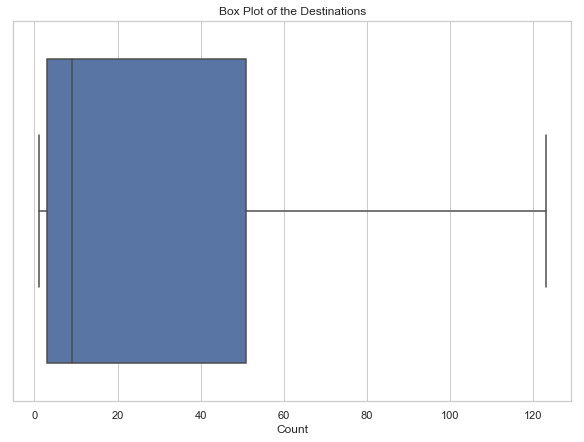

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(expediaDF['srch_destination_id'].value_counts(),showfliers=False)
plt.title('Box Plot of the Destinations')
plt.xlabel('Count')
plt.show()

### Type of Destination

In [61]:
unique = expediaDF['srch_destination_type_id'].unique().size
print("Total n. type of destinations: ", unique)

Total n. type of destinations:  10


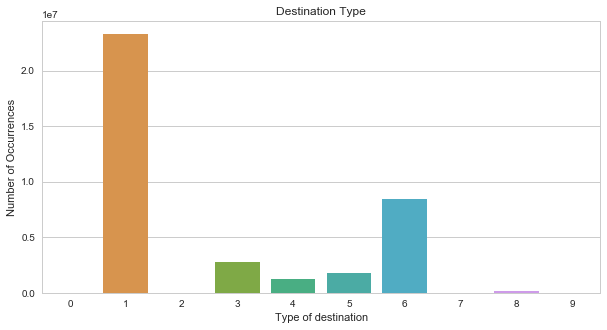

In [69]:
destTypeCount  = expediaDF['srch_destination_type_id'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(destTypeCount.index, destTypeCount.values)
plt.title('Destination Type')
plt.ylabel('Number of Occurrences')
plt.xlabel('Type of destination')
plt.show()

### Booking vs Click

Click      34669600
Booking     3000693
Name: is_booking, dtype: int64


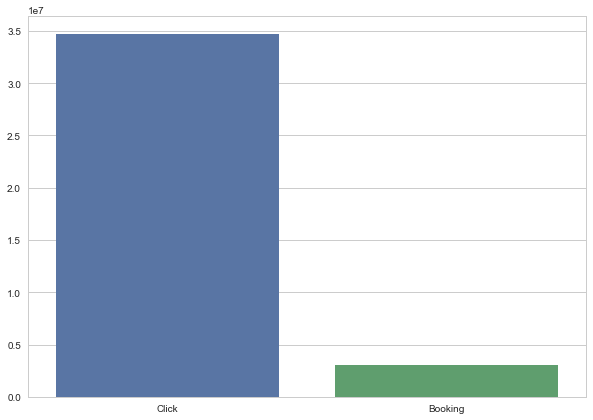

In [81]:
#1 is booking, 0 click
bookingCount = expediaDF.is_booking.value_counts()
bookingCount.index = ["Click",  "Booking"]
sns.barplot(bookingCount.index, bookingCount.values)

ax.set_ylabel("Quantity")
ax.set_xlabel("Type")
ax.set_title('Features Quantity per Type')
print(bookingCount)

### Missing Values

**Missing values** 
orig_destination_distance    13525001
srch_co                         47084
srch_ci                         47083
dtype: int64


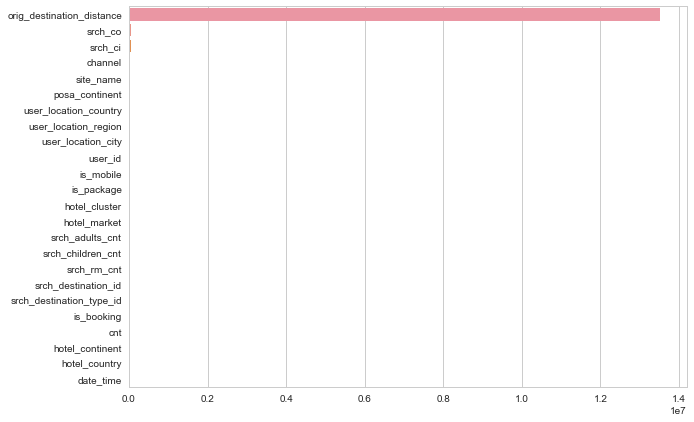

In [108]:
missingValues = expediaDF.isnull().sum().sort_values(ascending=False)
print('**Missing values** ')
print(missingValues[missingValues > 0])
sns.barplot(missingValues.values, missingValues.index)

### Checkin / Checkout

In [71]:
checkInOut = expediaDF.dropna(subset = ['srch_ci', 'srch_co'])

In [72]:
size = checkInOut[checkInOut['srch_co'] < checkInOut['srch_ci']].size
print("Checkin after  Checkout: ", size)

Checkin after  Checkout:  19152


In [73]:
checkInOut = checkInOut[checkInOut['srch_co'] > checkInOut['srch_ci']] #normalization
checkInOut['srch_ci'] = checkInOut['srch_ci'].astype('datetime64[ns]')
checkInOut['srch_co'] = checkInOut['srch_co'].astype('datetime64[ns]')
diff = checkInOut['srch_co'] - checkInOut['srch_ci']
checkInOut['duration'] = (diff / np.timedelta64(1, 'D')).astype(int)

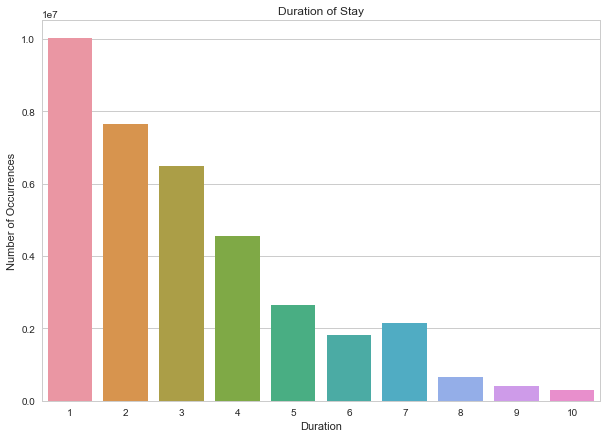

In [52]:
diffCount = diff.value_counts()
diffCount.index = (diffCount.index / np.timedelta64(1, 'D')).astype(int)
diffCount = diffCount.sort_values(ascending=False)
top10 = diffCount[:10]

sns.barplot(top10.index, top10.values)
plt.title('Duration of Stay')
plt.ylabel('Number of Occurrences')
plt.xlabel('Duration')
plt.show()


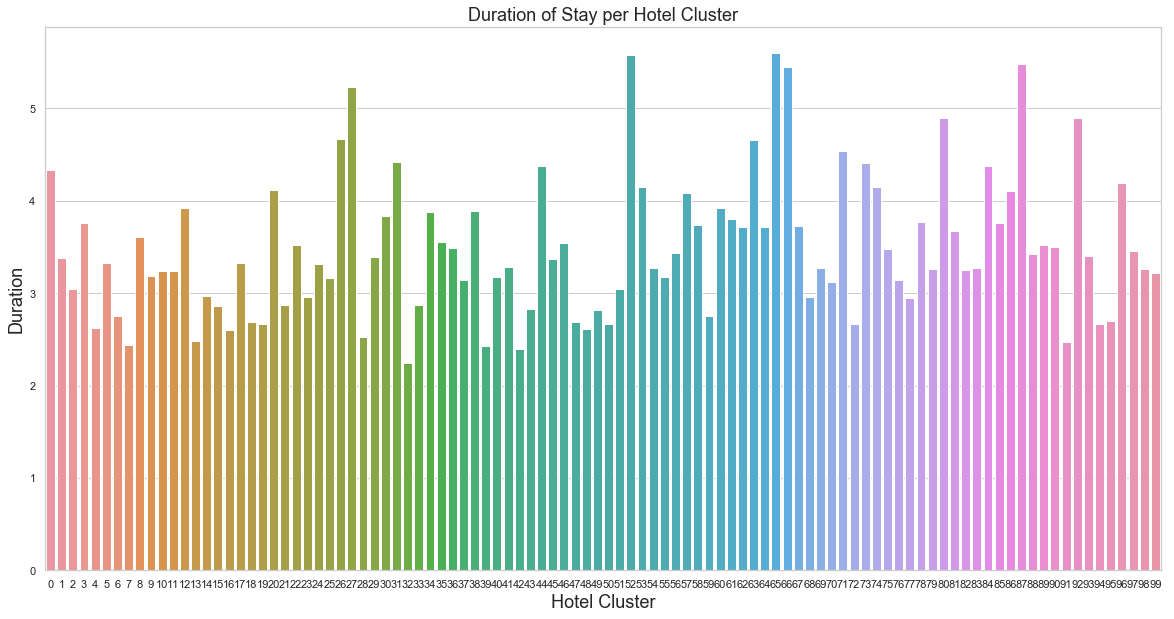

In [86]:
data = checkInOut.groupby('hotel_cluster').duration.mean()

plt.figure(figsize=(20,10))
sns.barplot(data.index, data.values)
plt.title('Duration of Stay per Hotel Cluster', fontsize=18)
plt.ylabel('Duration', fontsize=18)
plt.xlabel('Hotel Cluster', fontsize=18)
plt.show()

In [ ]:
del checkInOut
del diff
del diffCount

### Search numbers

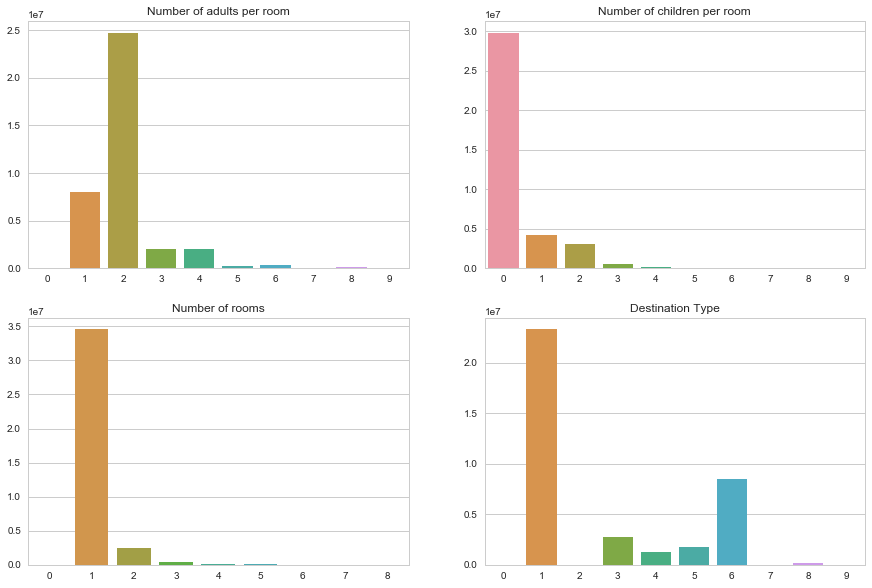

In [16]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,10))

adultsCnt = expediaDF.srch_adults_cnt.value_counts()
sns.barplot(adultsCnt.index, adultsCnt.values, ax=ax1)
# sns.countplot(adultsCnt, ax=ax1)
ax1.set_title('Number of adults per room')

childrenCnt = expediaDF.srch_children_cnt.value_counts()
sns.barplot(childrenCnt.index, childrenCnt.values, ax=ax2)
ax2.set_title('Number of children per room')

roomCnt = expediaDF.srch_rm_cnt.value_counts()
sns.barplot(roomCnt.index, roomCnt.values, ax=ax3)
ax3.set_title('Number of rooms')

destTypeCnt = expediaDF.srch_destination_type_id.value_counts()
sns.barplot(destTypeCnt.index, destTypeCnt.values, ax=ax4)
ax4.set_title('Destination Type')

plt.show()

### Boolean values

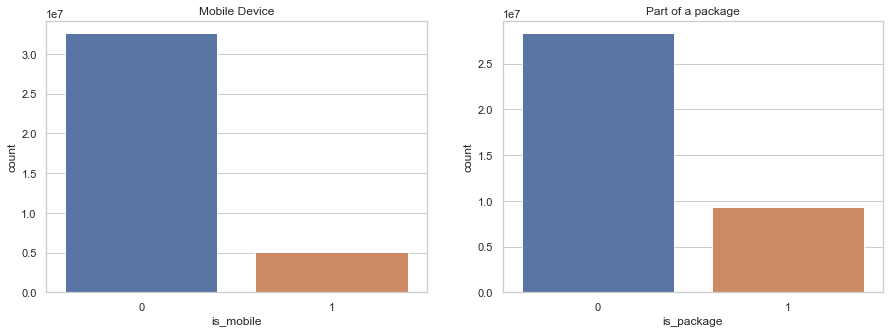

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(expediaDF["is_mobile"], ax=ax1)
ax1.set_title('Mobile Device')

sns.countplot(expediaDF["is_package"], ax=ax2)
ax2.set_title('Part of a package')


plt.show()

### Correlation Map

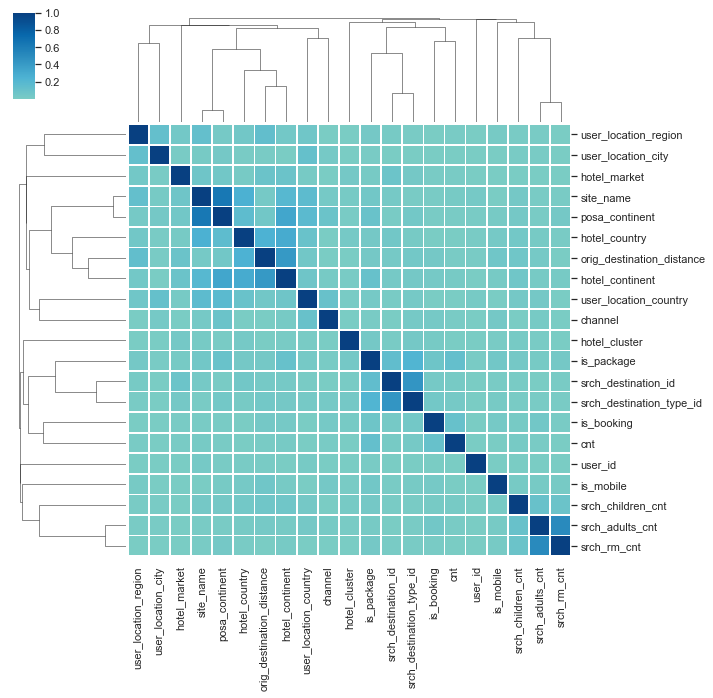

In [52]:
CorrelationMat=expediaDF.corr().abs()
sns.clustermap(CorrelationMat, center=0, cmap="GnBu",
               linewidths=.75, figsize=(10, 10), metric="correlation")
plt.show()
savefig('corrMap.jpg')

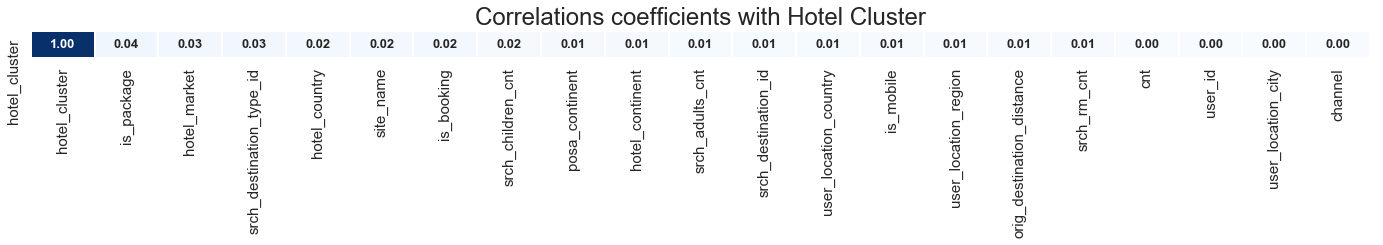

In [58]:
sorted_corr = (CorrelationMat.loc[:, ["hotel_cluster"]].sort_values(by="hotel_cluster", ascending=False).T)
plt.figure(figsize=(24, .5))
ax = sns.heatmap(sorted_corr, annot=True, annot_kws={"size":13, "weight":"bold"}, fmt=".2f", linewidths=1, cbar=False, cmap="Blues")
for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(15)
plt.title("Correlations coefficients with Hotel Cluster")
ax.title.set_fontsize(24)
plt.show()

## Features correlated to Hotel Cluster

- Destinations per Hotel Cluster

In [5]:
smallDF = expediaDF[:1000]

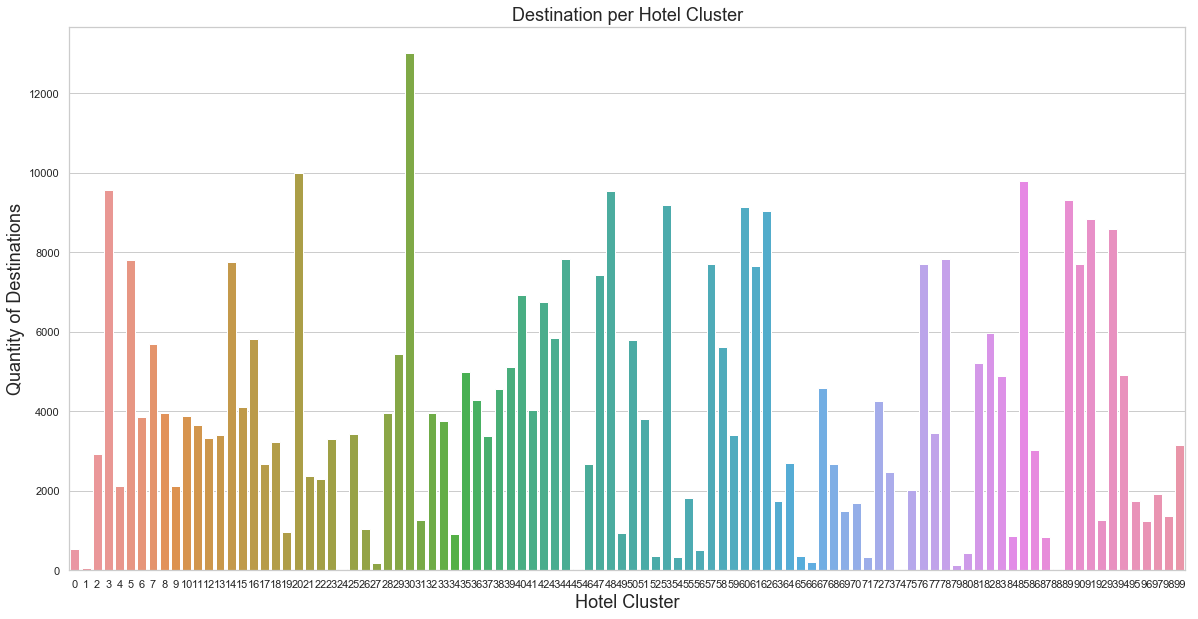

In [36]:
data = expediaDF.groupby('hotel_cluster').srch_destination_id.nunique()

plt.figure(figsize=(20,10))
sns.barplot(data.index, data.values)
plt.title('Destinations by Hotel Cluster', fontsize=18)
plt.ylabel('Quantity of Destinations', fontsize=18)
plt.xlabel('Hotel Cluster', fontsize=18)
plt.show()

- Mean of number of adults by hotel cluster

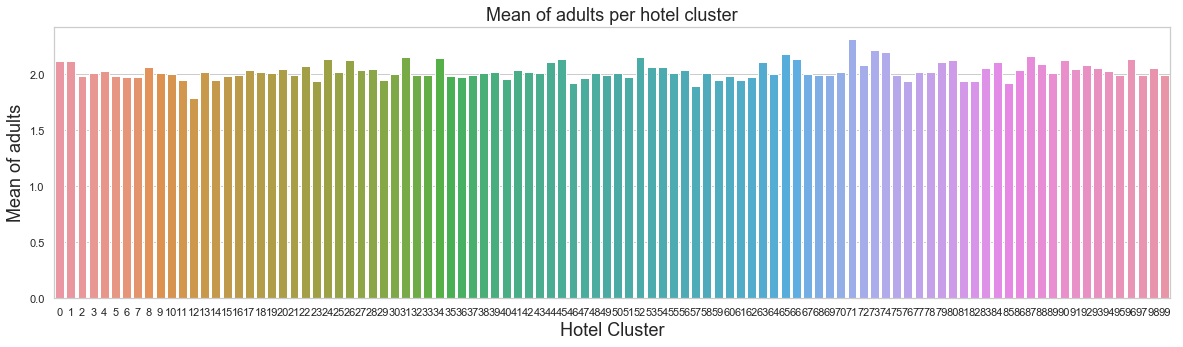

In [74]:
data = expediaDF.groupby('hotel_cluster').srch_adults_cnt.mean()

plt.figure(figsize=(20,5))
sns.barplot(data.index, data.values)
plt.title('Mean of adults per hotel cluster', fontsize=18)
plt.ylabel('Mean of adults', fontsize=18)
plt.xlabel('Hotel Cluster', fontsize=18)
plt.show()

- Mean of number of children per hotel cluster

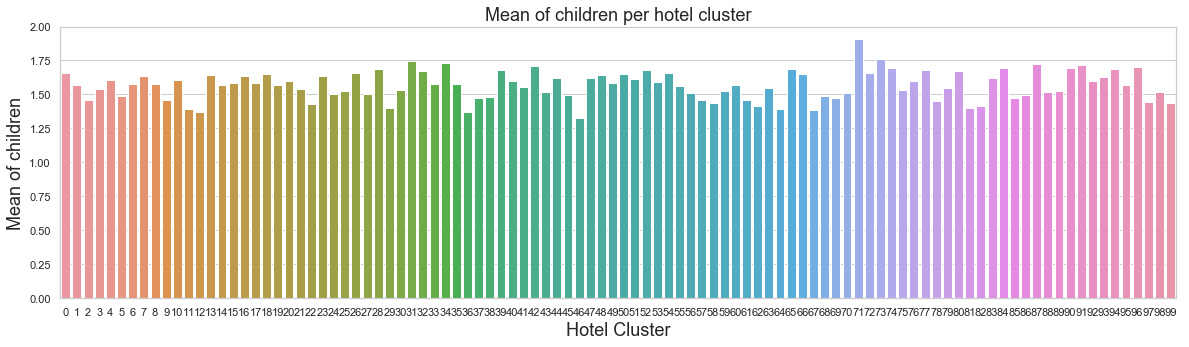

In [87]:
data = expediaDF.dropna(subset=['srch_children_cnt'])
data = data[data.srch_children_cnt > 0]
data = data.groupby('hotel_cluster').srch_children_cnt.mean()

plt.figure(figsize=(20,5))
sns.barplot(data.index, data.values)
plt.title('Mean of children per hotel cluster', fontsize=18)
plt.ylabel('Mean of children', fontsize=18)
plt.xlabel('Hotel Cluster', fontsize=18)
plt.show()



### Popular Hotel Cluster

- Popular Hotel Cluster per Destination

In [119]:
popularClustersDF = expediaDF.groupby(['srch_destination_id']).hotel_cluster.value_counts().to_frame()
popularClustersDF[:10]

hotel_cluster
srch_destination_id hotel_cluster               
0                   3                          2
1                   20                        26
                    30                        22
                    60                        17
                    57                         1
2                   30                         5
                    20                         4
                    5                          1
                    38                         1
                    41                         1

- Popular Hotel Cluster per Hotel Country

In [138]:
popularClustersDF = expediaDF.groupby(['hotel_country']).hotel_cluster.value_counts().to_frame()
popularClustersDF[:10]

hotel_cluster
hotel_country hotel_cluster               
0             8                      34551
              35                      3924
              20                      2384
              22                      2344
              30                      2274
              40                      1784
              78                      1361
              5                       1309
              36                       885
              58                       863

- Popular Hotel Cluster per Hotel Market

In [166]:
popularClustersDF = expediaDF.groupby(['hotel_market']).hotel_cluster.value_counts().to_frame()
popularClustersDF[:10]

hotel_cluster
hotel_market hotel_cluster               
0            3                        788
             89                       249
             53                        30
             57                        18
             60                        18
1            82                       303
             5                        235
             78                       156
             58                        96
             93                        75

- Popular Hotel Cluster

In [167]:
popularClustersDF = expediaDF.hotel_cluster.value_counts().to_frame()
popularClustersDF[:10]

,hotel_cluster
91,1043720
41,772743
48,754033
64,704734
65,670960
5,620194
98,589178
59,570291
42,551605
21,550092


- Popular Hotel Cluster per User Location City

In [137]:
popularClustersDF = expediaDF.groupby(['user_location_city']).hotel_cluster.value_counts().to_frame()
popularClustersDF[:10]

hotel_cluster
user_location_city hotel_cluster               
0                  91                        54
                   50                        42
                   65                        39
                   54                        36
                   18                        27
                   48                        27
                   92                        27
                   63                        24
                   66                        24
                   23                        23